In [1]:
import pandas as pd 
import numpy as np 

X = pd.read_csv('../Boosts/Datasets/X_train.csv')
y = pd.read_csv('../Boosts/Datasets/y_train.csv')
X_valid = pd.read_csv('../Boosts/Datasets/X_test.csv')
valid_user_id = pd.read_csv('../Boosts/Datasets/test_user_id.csv')

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [3]:
from keras.models import load_model
dnn = load_model('../Boosts/SavedModels/DNN.h5');dnn

In [4]:
history = dnn.fit(X_train, np.ravel(y_train), epochs=100, batch_size=32,
                  validation_data=(X_val, np.ravel(y_val)), verbose=0)

In [5]:
y_pred = dnn.predict(X_test)

415/415 [==============================] - 1s 1ms/step


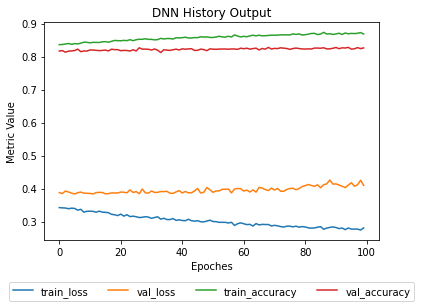

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=5)
plt.title("DNN History Output")
plt.xlabel('Epoches')
plt.ylabel('Metric Value')
plt.show()

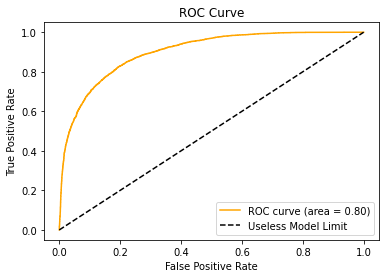

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(np.ravel(y_test), y_pred)
auc = roc_auc_score(np.ravel(y_test), np.round(y_pred))

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

In [8]:
pd.DataFrame(classification_report(y_test, np.round(y_pred), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.833487,0.800218,0.821954,0.816852,0.820639
recall,0.887168,0.718304,0.821954,0.802736,0.821954
f1-score,0.859490,0.757052,0.821954,0.808271,0.819929
support,8136.000000,5119.000000,0.821954,13255.000000,13255.000000


In [33]:
dnn.save('../Boosts/SavedModels/DNN.h5')

In [11]:
history = dnn.fit(X, np.ravel(y), epochs=100, batch_size=32,
                  validation_data=(X_val, np.ravel(y_val)), verbose=0)

In [12]:
dnn_submission = dnn.predict(X_valid)

415/415 [==============================] - 1s 1ms/step


In [25]:
valid_user_id['moved_after_2019'] = np.round(dnn_submission);valid_user_id.head()

,user_id,moved_after_2019
0,17449,0.0
1,33967,0.0
2,2110,0.0
3,55082,0.0
4,37165,0.0


In [34]:
valid_user_id['moved_after_2019'] = valid_user_id['moved_after_2019'].astype(int)

In [35]:
valid_user_id.to_csv('../Boosts/Submissions/dnn_submission.csv', index=False)